Copyright (c) University of Strasbourg. All Rights Reserved.

# Deep Temporal Model for Surgical Phase Recognition
-------------------
**Learning from a tiny dataset of manual annotations: a teacher/student approach for surgical phase recognition (IPCAI 2019)**

_Tong Yu, Didier Mutter, Jacques Marescaux, Nicolas Padoy_

[![arXiv](https://img.shields.io/badge/arxiv-1812.00033-red)](https://arxiv.org/abs/1812.00033)

## Prerequisites

In [ ]:
%%bash
git clone https://github.com/CAMMA-public/Surgical-Phase-Recognition.git

In [ ]:
import os
os.chdir("Surgical-Phase-Recognition")

In [ ]:
%%bash
pip uninstall -y tensorflow
pip install ruamel_yaml
pip install tensorflow-gpu==1.14

In [1]:
from process_video import phase_recognition, phase_plot

## Downloading the data

In [2]:
VIDPATH = "phase_recognition_example.mp4"

Model checkpoints:

In [ ]:
!wget --content-disposition https://s3.unistra.fr/camma_public/github/phase_recognition/checkpoints.zip

Video samples:

In [ ]:
!wget --content-disposition https://s3.unistra.fr/camma_public/github/phase_recognition/videos.zip

Unzipping:

In [ ]:
!unzip videos.zip

In [ ]:
!unzip checkpoints.zip

Phase lookup table:

In [3]:
PHASES = [
    "Preparation",
    "CalotTriangleDissection",
    "ClippingAndCutting",
    "GallbladderDissection",
    "GallbladderPackaging",
    "CleaningAndCoagulation",
    "GallbladderRetraction"
]

## Predicting phases

In [ ]:
phases = phase_recognition(VIDPATH)

## Visualizing the results

[Text(1, 0, 'Preparation'),
 Text(1, 0, 'CalotTriangleDissection'),
 Text(1, 0, 'ClippingAndCutting'),
 Text(1, 0, 'GallbladderDissection'),
 Text(1, 0, 'GallbladderPackaging'),
 Text(1, 0, 'CleaningAndCoagulation'),
 Text(1, 0, 'GallbladderRetraction')]

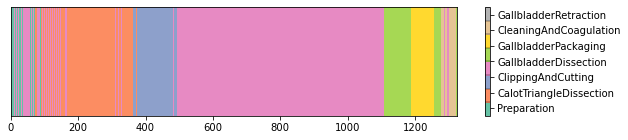

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 2))
ax = fig.add_subplot(111)
ax.set_yticks([], [])
im = ax.pcolormesh(phases, cmap="Set2", vmin=1, vmax=8)
cbar = fig.colorbar(im, ticks=[1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5], orientation="vertical", drawedges=True)
cbar.ax.set_yticklabels(PHASES)